In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [235]:
df=pd.read_csv('/content/drive/MyDrive/train (1).csv')

## Data exploring


In [236]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [238]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [239]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [240]:
df.sample()
#we notice that some data like name Ticket PassengerId are not important 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0,B20,S


In [241]:
# we will clean our data be removing dublicates and handling missing values

In [242]:
df.duplicated().sum()

0

In [243]:
# great no duplicate

In [244]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [245]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [246]:
## we will remove the column Cabin as it has too many missing values in addition to unimportant columns (name,passengerId)

In [247]:
df=df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [248]:
## we should try to imput the value of the embarked column and Age

In [249]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [250]:
#we will impute the missing values of embarked with S which is the top repeated
df.loc[df['Embarked'].isnull(),'Embarked']='S'

In [251]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [252]:
# we will now impute the missing values of Age 

In [253]:
df['Age'].mean()

29.69911764705882

In [254]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-254-2d26ea740ee2>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Age']=df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [255]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [256]:
# now our data is ready to be explored 


## Univariate Analysis


0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


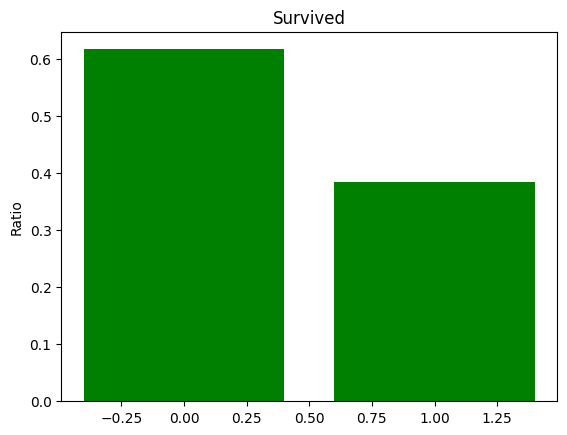

In [257]:
# we will try to see the ratio of survived people in our data 
def exploreColumn(col):
  print(df[col].value_counts())
  print(df[col].value_counts(normalize=True))
  plt.bar(df[col].value_counts().index,df[col].value_counts(normalize=True),color='green')
  plt.ylabel('Ratio')
  plt.title(col)
  plt.show()

exploreColumn('Survived')

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


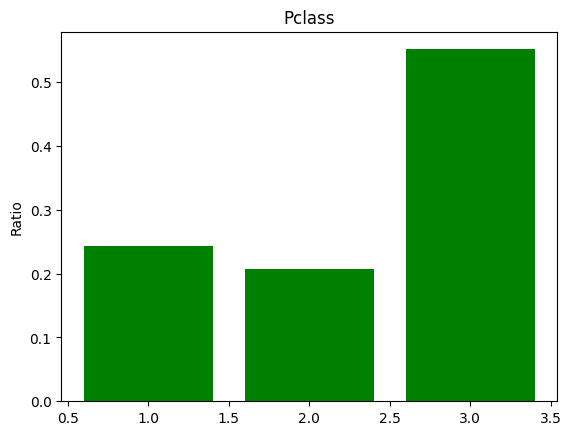

In [258]:
exploreColumn('Pclass')



0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


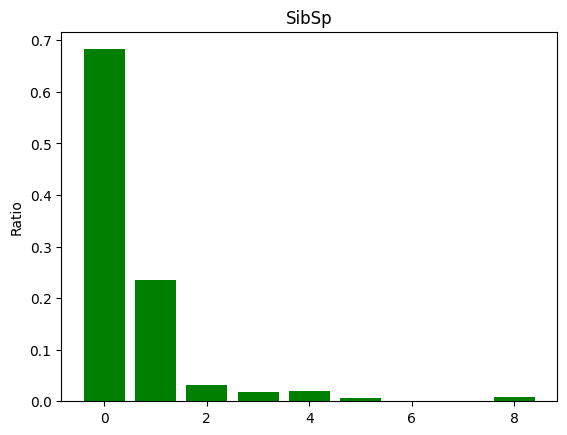

In [259]:
exploreColumn('SibSp')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


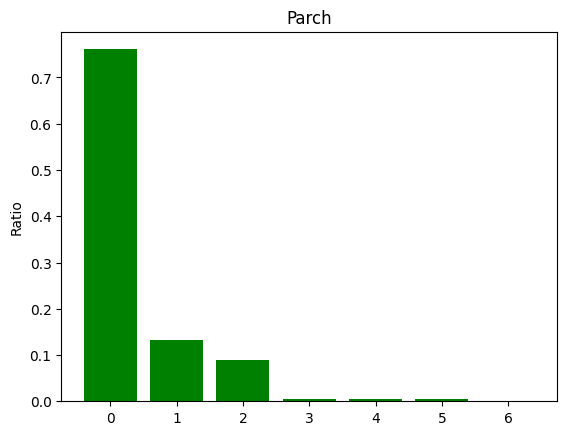

In [260]:
exploreColumn('Parch')

S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


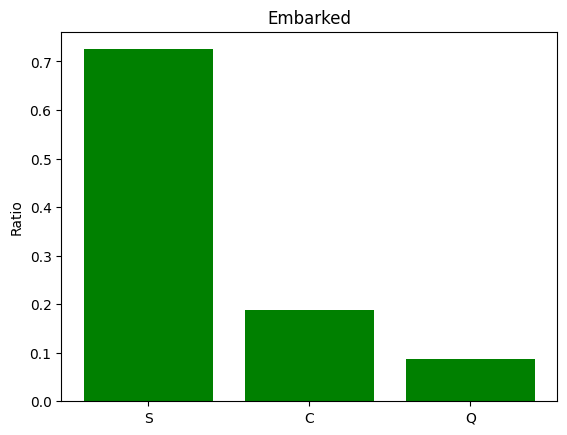

In [261]:
exploreColumn('Embarked')

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


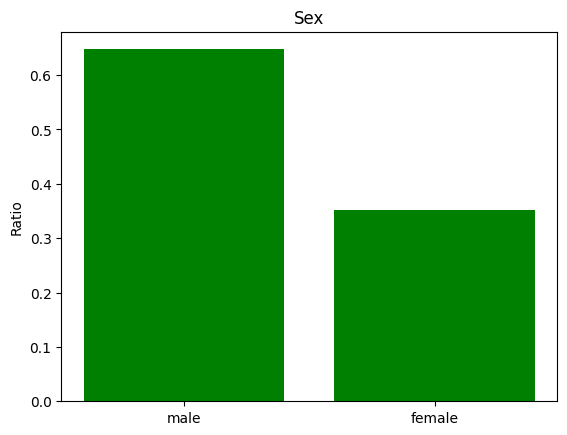

In [262]:
exploreColumn('Sex')

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

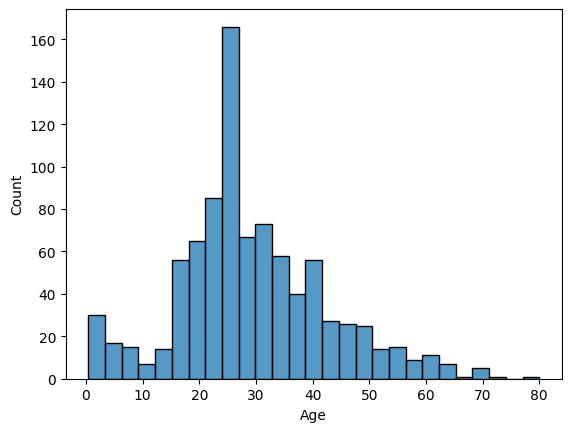

In [263]:
print(df['Age'].describe())
sns.histplot(data=df,x='Age')

<Axes: xlabel='Fare', ylabel='Count'>

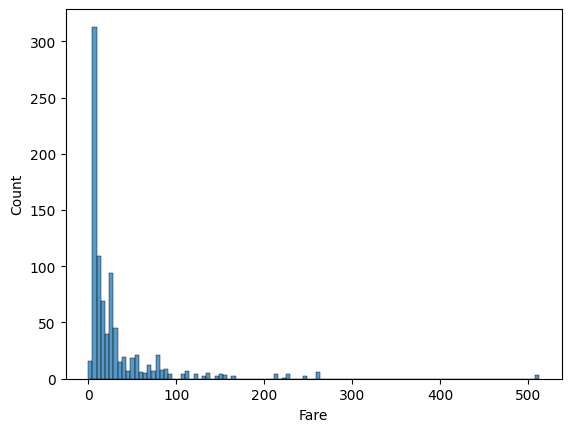

In [264]:
df['Fare'].describe()
sns.histplot(data=df,x='Fare')


<Axes: xlabel='Fare'>

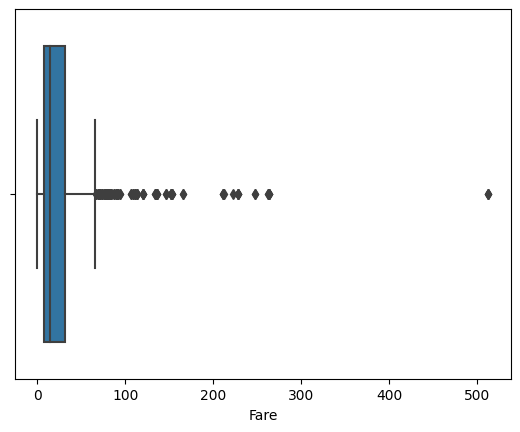

In [265]:
#there seems to be a lot of oultiers in Fare
sns.boxplot(data=df,x='Fare')

In [266]:
df=df[df['Fare']<180]

<Axes: xlabel='Fare'>

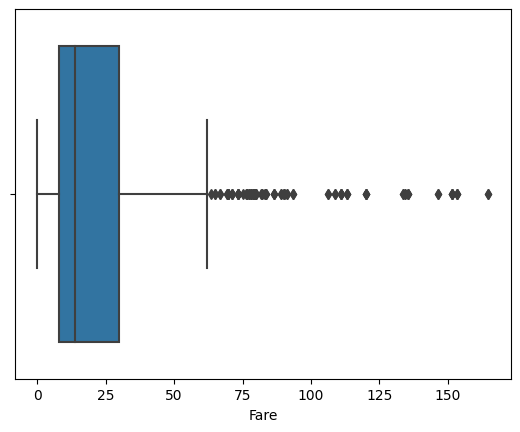

In [267]:
sns.boxplot(data=df,x='Fare')

<Axes: xlabel='Fare', ylabel='Count'>

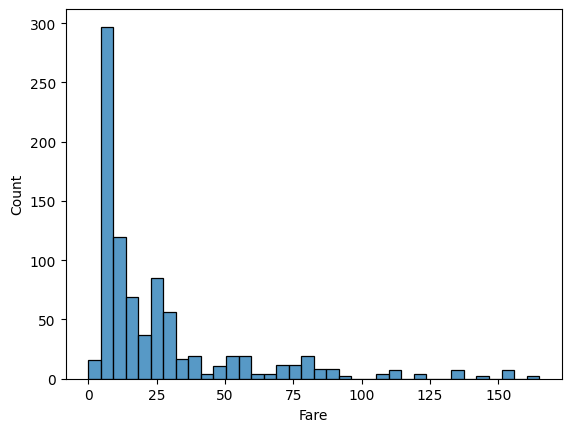

In [268]:
df['Fare'].describe()
sns.histplot(data=df,x='Fare')


## Bivariate Analysis

In [269]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [270]:
#we will first try to find relation between class and Survivved

Pclass
1    0.622449
2    0.472826
3    0.242363
Name: Survived, dtype: float64


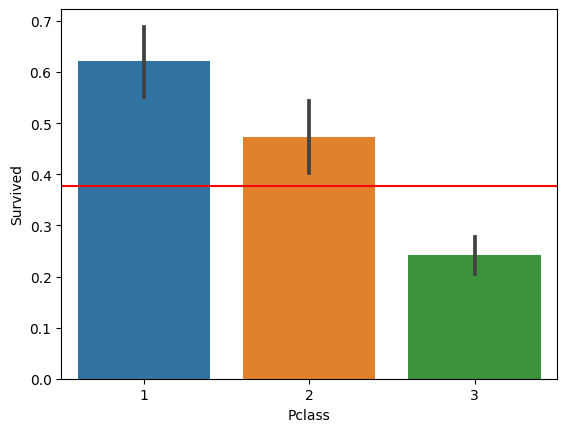

In [271]:
print(df.groupby(['Pclass'])['Survived'].mean())
sns.barplot(data=df,x='Pclass',y='Survived')
plt.axhline(df.Survived.mean(),color='Red')

Sex
female    0.731788
male      0.188049
Name: Survived, dtype: float64


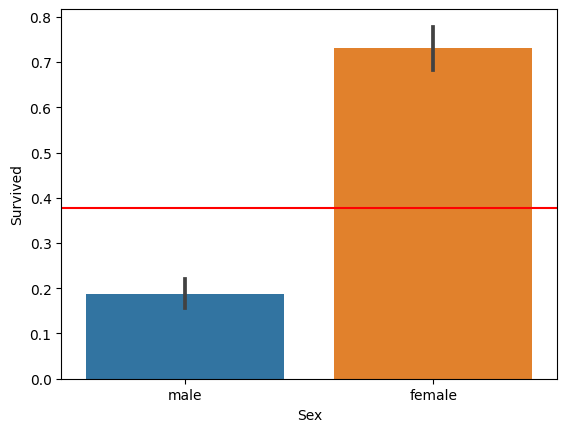

In [272]:
print(df.groupby(['Sex'])['Survived'].mean())
sns.barplot(data=df,x='Sex',y='Survived')
plt.axhline(df.Survived.mean(),color='Red')

count    871.000000
mean      29.044971
std       13.320943
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

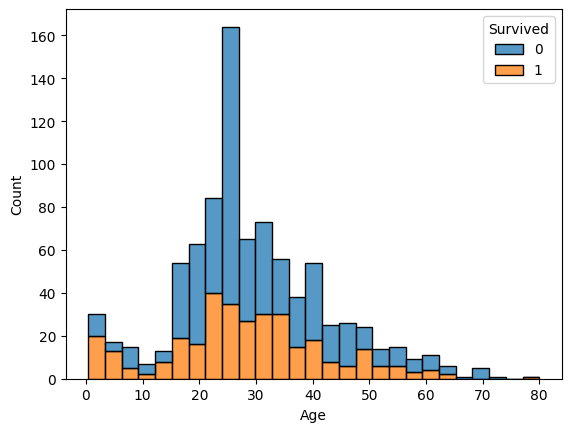

In [273]:
print(df['Age'].describe())
sns.histplot(data=df,x='Age',hue='Survived',multiple='stack')

In [277]:
df['ageLabel']=pd.cut(df['Age'],bins=[0,18,29,40,80],labels=['Child','Youth','Senior','Old'])

In [278]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ageLabel
0,0,3,male,22.0,1,0,7.2500,S,Youth
1,1,1,female,38.0,1,0,71.2833,C,Senior
2,1,3,female,26.0,0,0,7.9250,S,Youth
3,1,1,female,35.0,1,0,53.1000,S,Senior
4,0,3,male,35.0,0,0,8.0500,S,Senior


count    871.000000
mean       0.376579
std        0.484806
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


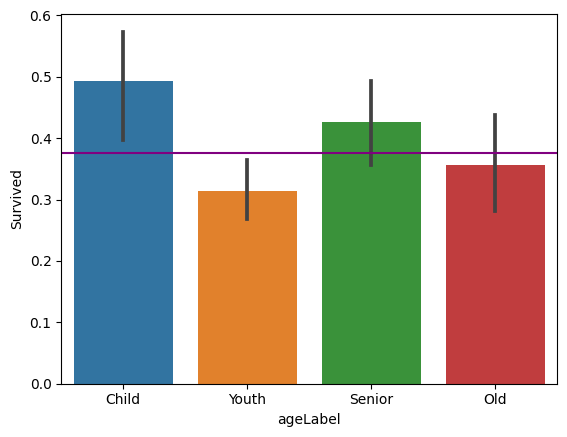

In [283]:
print(df['Survived'].describe())
sns.barplot(data=df,x='ageLabel',y='Survived')
plt.axhline(df['Survived'].mean(),color="purple")

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64


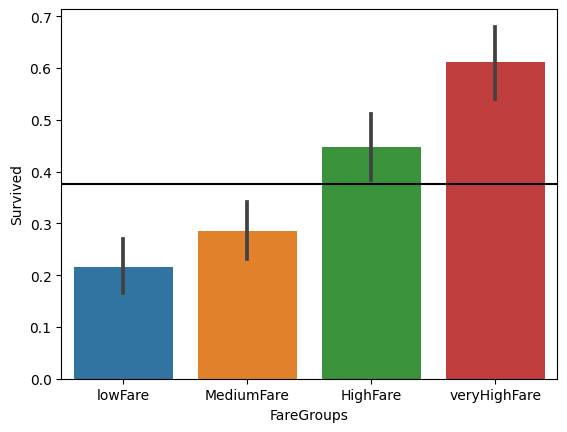

In [291]:
# we will do the same with fare
print(df['Fare'].describe())
df['FareGroups']=pd.cut(df['Fare'],bins=[-1,8,15,35,200],labels=['lowFare','MediumFare','HighFare','veryHighFare'])
sns.barplot(data=df,x='FareGroups',y='Survived')
plt.axhline(df['Survived'].mean(),color='black')

<Axes: xlabel='Embarked', ylabel='Survived'>

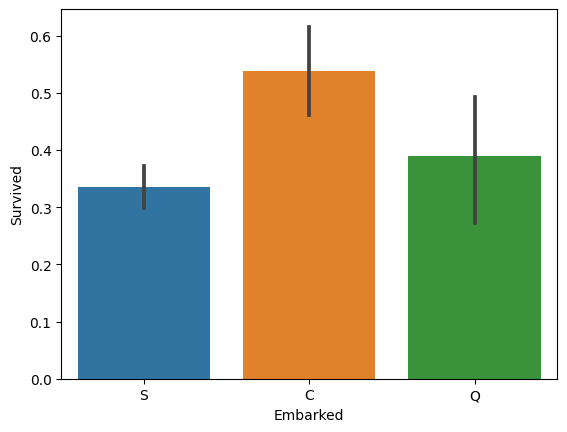

In [320]:
sns.barplot(data=df,x='Embarked',y='Survived')

## Multivariate Analysis

In [292]:
df.corr()

<ipython-input-292-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.329285,-0.060617,-0.040547,0.080408,0.298671
Pclass,-0.329285,1.000000,-0.421816,0.094324,0.051138,-0.653248
Age,-0.060617,-0.421816,1.000000,-0.247033,-0.188450,0.161594
SibSp,-0.040547,0.094324,-0.247033,1.000000,0.409380,0.246085
Parch,0.080408,0.051138,-0.188450,0.409380,1.000000,0.230427
Fare,0.298671,-0.653248,0.161594,0.246085,0.230427,1.000000


<ipython-input-299-407fc1d37529>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

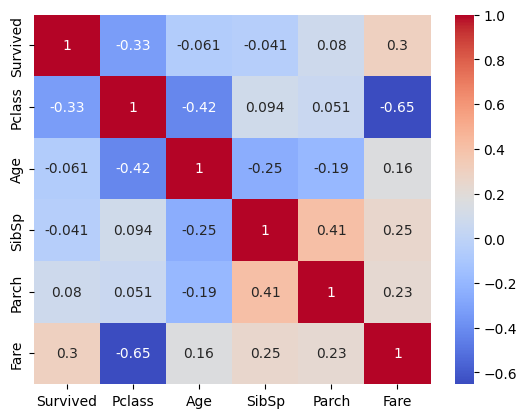

In [299]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Text(0, 0.5, 'Pclass')

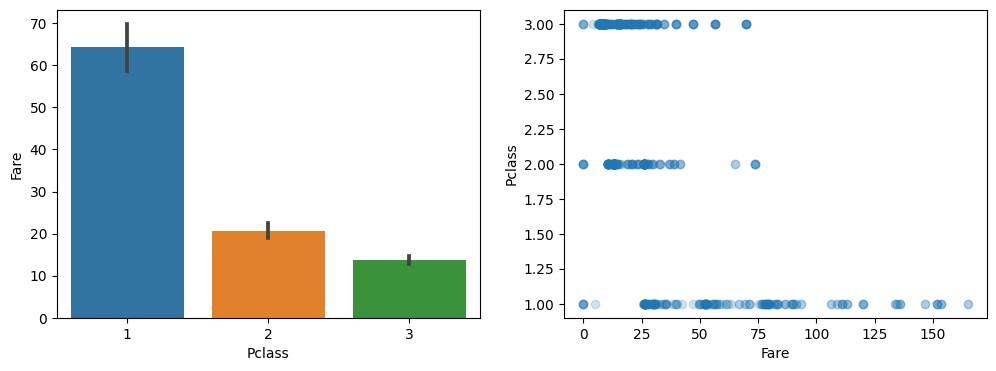

In [319]:
# there is a relation between pclass and the the fare paid which is reasonable 
fig ,ax=plt.subplots(1,2,figsize=(12,4))

sns.barplot(data=df,x='Pclass',y='Fare',ax=ax[0])

ax[1].scatter(df['Fare'],df['Pclass'],alpha=0.2)
ax[1].set_xlabel('Fare')
ax[1].set_ylabel('Pclass')

#sns.boxplot(data=df,x='Pclass',y='Fare',ax=ax[1])



# **Conclusion**



*   Survival rate of female is much higher than male
*   Survival rate of people who are in the first class is high
*   There is a direct relation between Fare paid and pclass
*   People who has embarked C has a higher probality to survive








